# ***Polynomial Regression form scratch***

In [440]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RMSE: 0.1238172807470905


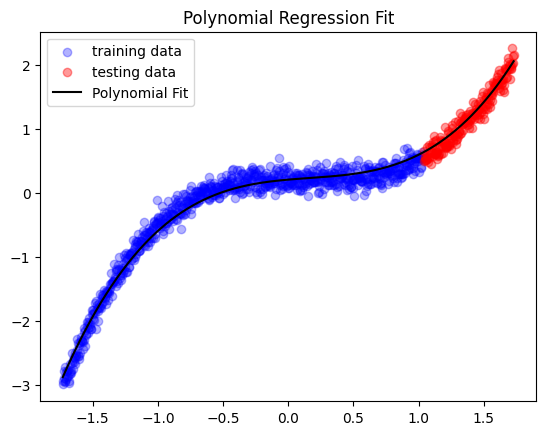

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data fetching
df = pd.read_csv("../DataSets/non_linear_dataset.csv")

# data splitting
features = df["x"].values
target = df["y"].values

# normalization
features = (features - np.mean(features)) / np.std(features)
target = (target - np.mean(target)) / np.std(target)

# polynomial feature generation
def set_degree(features, deg):
    new_features = []
    for x in features:
        new_features.append([x**d for d in range(1, deg+1)])
    return np.array(new_features)

degree = 3
new_features = set_degree(features, degree)

# train-test split
x_train = new_features[:800]
y_train = target[:800].reshape(-1, 1)
x_test = new_features[800:]
y_test = target[800:].reshape(-1, 1)

# parameters
epochs = 10000
b = np.ones((x_train.shape[1], 1))
delta = 0.001
lambda_reg = 2.5

# Gradient Descent
for epoch in range(epochs):
    y_pred = x_train @ b
    gradient = (2/len(x_train)) * (x_train.T @ (y_pred - y_train))
    b -= delta * (gradient + lambda_reg * b)   # L2 regularization correctly applied
    # b -= delta * gradient  

# predict
y_pred_all = new_features @ b
y_pred_all = (y_pred_all - np.mean(y_pred_all))/np.std(y_pred_all)
# RMSE
rmse = np.sqrt(np.mean((y_pred_all - target.reshape(-1, 1))**2))
print("RMSE:", rmse)

# Sorting for smooth curve
sorted_indices = np.argsort(features)
plt.scatter(features[:800], target[:800], label="training data",color="blue",alpha=0.3)
plt.scatter(features[800:], target[800:], label="testing data",color="red",alpha=0.4)
plt.plot(features[sorted_indices], y_pred_all[sorted_indices], label="Polynomial Fit",color="black")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()


# using libraries 

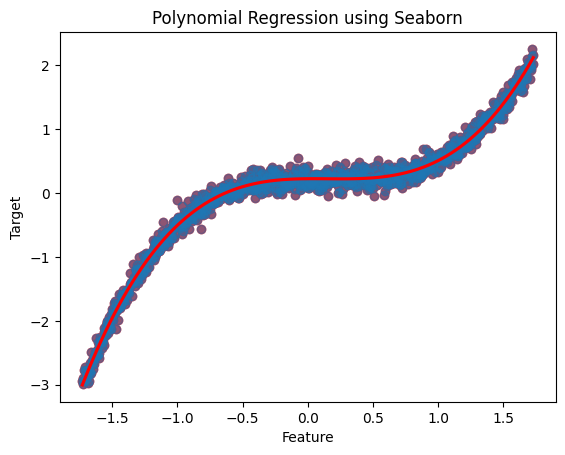

In [442]:
import seaborn as sns

# features and target (1D arrays)
features = df["x"].values
target = df["y"].values

# Optional: normalize data
features = (features - features.mean()) / features.std()
target = (target - target.mean()) / target.std()

# Plot non-linear regression (polynomial of degree 2)
sns.regplot(x=features, y=target, order=3, ci=None, color='red')

# Scatter plot of actual points
plt.scatter(features, target, alpha=0.5)
plt.title("Polynomial Regression using Seaborn")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()
